## 📝 Task List

Your written report should include both code, output and written text summaries of the following:
- Data Validation:   
  - Describe validation and cleaning steps for every column in the data 
- Exploratory Analysis:  
  - Include two different graphics showing single variables only to demonstrate the characteristics of data  
  - Include at least one graphic showing two or more variables to represent the relationship between features
  - Describe your findings
- Model Development
  - Include your reasons for selecting the models you use as well as a statement of the problem type
  - Code to fit the baseline and comparison models
- Model Evaluation
  - Describe the performance of the two models based on an appropriate metric
- Business Metrics
  - Define a way to compare your model performance to the business
  - Describe how your models perform using this approach
- Final summary including recommendations that the business should undertake

From: Daniil
To: Head of Data Science
Subject: Report on the assigned project

1) Data Validation
First, of all after uploading the data it was found that it contains 52 NaN values in calories, carbohydrate, sugar, protein. I tried to use KNN imputer, however it didn't work out well, so I abandoned the idea as the results of the model turned out to be worse, so the decision was to drop 52 missing rows. High traffic also has missing values but in this case, it is not missing at random, so I just replaced NA values with Not High.
Backlog of changes:
calories - NA rows, extreme outliers (Q3 + 3 * IQR) were capped, scaled using MinMax
carbohydrate - NA rows dropped, extreme outliers (Q3 + 3 * IQR) were capped, scaled using MinMax
sugar - NA rows dropped, extreme outliers (Q3 + 3 * IQR) were capped, scaled using MinMax
protein - NA rows dropped, extreme outliers (Q3 + 3 * IQR) were capped, scaled using MinMax
category - 'Chicken Breast' values for changed to 'Chicken', then columns were one hot encoded
servings - 2 values contained 'as a snack', they belonged to Lunch/Snack category so 'as a snack' was removed, the column was transformed to float 64
high_traffic - NaN values were replaced with 'not high' and then changed to 1 - high, 0 - not high

2) Exploratory Analysis
Not to overload report I will ask you to refer to the graphs that will be enclosed below my report in the c.
First, after plotting histograms of our numeric variables (calories,carbohydrate, sugar, protein,protein) we can clearly observe that data is skewed left with some outliers that will be later capped. Also, as for the largest number of categories observed from count plot we can see that chicken, brekfast, beverages have the most recipes.
Second, judging from category by traffic graphic, we observe that the categories like vegetable, potato have the highest traffic labels, on the other hand beverages, beverages, breakfast contain a lot of not high labels. This gives good sense of what categories maybe popular and not.
Third, after looking at barplots of high traffic vs numeric columns, we may conclude that on average the larger number of serving, calories, carbohydrate, protein results in high traffic, sugar has the opposite affect: on average if we have more sugar it results in low traffic
Fourth, after having a look at correlation heat map we can observe different correlations for our categories: category_Beverages = -0.38, category_Vegetable = 0.25, category_Potato = 0.22, category_Breakfast = -0.21. Which confirms our findings from the second step.

4) Model Development
We can be sure that it is classification problem.  Here we predict if the recipe shown will result in 1 high traffic, 0 - not high traffic.
At first I ran LogisticRegression, KNeighborsClassifier,GaussianNB, DecisionTreeClassifier,RandomForestClassifier ,LinearSVC, Perceptron, SGDClassifier. Cross Validation (k=10) F1, precision and recall over 80% were the main metrics to assess the quality of the models. Based on these metrics I've chosen three models LogisticRegression, LinearSVC, SGDClassifier. However, LinearSVC seems to replicate the results of logistic regression. So as a base model I left only LogisticRegression and SGDClassifier as comparison model.

5)Model Evaluation

Logistic Regression
CV f1 score is 0.7979
CV precision is 0.797
CV recall is 0.8014

Stochastic Gradient Descent Classifier
CV f1 score is 0.7738
CV precision is 0.7616
CV recall is 0.8952

As we see from the results of model evaluation Logistic Regression is more balanced and outperforms Stochastic Gradient Descent Classifier. What we want is the highest precision with decent recall. Stochastic Gradient Descent Classifier has great recall, but in this case it matters less than precision.

After that GridSearchCV with StratifiedKFold was employed to improve the results of the models. They turned out to arrive to the same results on our test data. (Interesting fact Stochastic Gradient Descent Classifier outperformed LogReg on CV after improvement)
Logistic Regression best params {'C': 0.1, 'class_weight': 'balanced', 'fit_intercept': True, 'penalty': 'l1', 'solver': 'saga'}
SGD Classifier params {'alpha': 0.01, 'l1_ratio': 1, 'loss': 'modified_huber', 'max_iter': 1000, 'penalty': 'elasticnet'}

Precision = 0.82
Recall = 0.80
F1 = 0.81

Final answer: both LogisticRegression and Stochastic Gradient Descent Classifier can be used for this taks. I would opt for Stochastic Gradient Descent Classifier because it is more computationally efficient, however if interpretability is important, logistic regression may be a better choice. Here we would choose LogisticRegression to create understandable metric.

6) Business Metrics
As per business to track the performance we will create high traffic rate:
Use LogisticRegresion that I developed to calculate the probabilities of a high traffic for each input. Average out these probabilities to get the final metric. The idea behind it is to increase high traffic rate, the ideal situation if we have high traffic rate = 1. However, it is not possible, because it will literally mean that each recipe high traffic. But the business objective is to get this metric as high as we can. 
Right now the metric is 0.52. Not bad but can be improved.

7) Final summary.
In conclusion, the main reccomendations are
1. Show categories that have great positive correlation such as vegetable, potato recipes
2. Show less categories that have less positive correlation such as beverages, breakfast 
3. Show more recipes that have more servings, good on calories, protein and carbohydrate and contain less sugar. ('healthy recipes')
4. Collect data on missing values to improve the performance of the model

In [1]:
# import necessary libraries
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
from sklearn.preprocessing import OneHotEncoder
import numpy as np 
import pandas as pd 
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score, plot_confusion_matrix, roc_curve, classification_report,plot_roc_curve
from sklearn.model_selection import StratifiedKFold
from scipy.stats.mstats import winsorize
import time
import warnings
warnings.filterwarnings('ignore')
import xgboost as xgb
import os

In [2]:
# connect dataframe
df = pd.read_csv(r'/kaggle/input/recipe-site-traffic/recipe_site_traffic_2212.csv')
df.head()

,recipe,calories,carbohydrate,sugar,protein,category,servings,high_traffic
0,1,NaN,NaN,NaN,NaN,Pork,6,High
1,2,35.48,38.56,0.66,0.92,Potato,4,High
2,3,914.28,42.68,3.09,2.88,Breakfast,1,NaN
3,4,97.03,30.56,38.63,0.02,Beverages,4,High
4,5,27.05,1.85,0.80,0.53,Beverages,4,NaN


In [3]:
# set index as recipe
df = df.set_index('recipe')

In [4]:
# check for duplicates
df.duplicated().any()

True

In [5]:
# study duplicates
duplicates = df[df.duplicated()]
duplicates

,calories,carbohydrate,sugar,protein,category,servings,high_traffic
recipe,,,,,,,
90,NaN,NaN,NaN,NaN,Pork,6,High
210,NaN,NaN,NaN,NaN,Dessert,2,High
352,NaN,NaN,NaN,NaN,Potato,4,High
355,NaN,NaN,NaN,NaN,Pork,4,High
377,NaN,NaN,NaN,NaN,Pork,6,High
389,NaN,NaN,NaN,NaN,Lunch/Snacks,4,High
428,NaN,NaN,NaN,NaN,Vegetable,4,High
456,NaN,NaN,NaN,NaN,Pork,6,High
539,NaN,NaN,NaN,NaN,Vegetable,4,High


In [6]:
# get statistical summary
df.describe()

,calories,carbohydrate,sugar,protein
count,895.000000,895.000000,895.000000,895.000000
mean,435.939196,35.069676,9.046547,24.149296
std,453.020997,43.949032,14.679176,36.369739
min,0.140000,0.030000,0.010000,0.000000
25%,110.430000,8.375000,1.690000,3.195000
50%,288.550000,21.480000,4.550000,10.800000
75%,597.650000,44.965000,9.800000,30.200000
max,3633.160000,530.420000,148.750000,363.360000


In [7]:
# check groups within category variables
for i in df.columns:
    print(df[i].value_counts())

47.89     2
34.97     2
529.26    2
128.30    2
35.48     1
         ..
92.21     1
472.91    1
409.03    1
31.75     1
184.56    1
Name: calories, Length: 891, dtype: int64
3.46     3
6.40     3
9.58     3
5.14     3
7.73     3
        ..
96.03    1
0.86     1
11.83    1
39.55    1
45.21    1
Name: carbohydrate, Length: 835, dtype: int64
1.62    5
1.51    5
2.97    4
1.27    4
0.77    4
       ..
5.44    1
1.80    1
2.00    1
9.00    1
6.20    1
Name: sugar, Length: 666, dtype: int64
0.36      6
0.93      4
0.02      4
0.04      4
0.38      4
         ..
22.89     1
169.78    1
14.14     1
15.08     1
8.07      1
Name: protein, Length: 772, dtype: int64
Breakfast         106
Chicken Breast     98
Beverages          92
Lunch/Snacks       89
Potato             88
Pork               84
Vegetable          83
Dessert            83
Meat               79
Chicken            74
One Dish Meal      71
Name: category, dtype: int64
4               389
6               197
2               183
1     

In [8]:
# separate numeric columns
numeric = df.select_dtypes(include=np.number)
numeric

,calories,carbohydrate,sugar,protein
recipe,,,,
1,NaN,NaN,NaN,NaN
2,35.48,38.56,0.66,0.92
3,914.28,42.68,3.09,2.88
4,97.03,30.56,38.63,0.02
5,27.05,1.85,0.80,0.53
...,...,...,...,...
943,1161.00,5.31,22.39,44.22
944,NaN,NaN,NaN,NaN
945,951.74,29.42,3.57,13.87


In [9]:
# separate non_numeric columns
non_numeric = df.select_dtypes(include='object')
non_numeric

,category,servings,high_traffic
recipe,,,
1,Pork,6,High
2,Potato,4,High
3,Breakfast,1,NaN
4,Beverages,4,High
5,Beverages,4,NaN
...,...,...,...
943,Lunch/Snacks,2,NaN
944,Potato,2,High
945,Pork,2,High


In [10]:
# run preprocessing
def preprocessing(df):
    df = df.dropna(how='all')
    df['servings'] = df['servings'].str.replace(' as a snack', '')
    df['high_traffic'] = df['high_traffic'].fillna('Not_High')
#     imputer = KNNImputer(n_neighbors=3)
#     imputed_data = imputer.fit_transform(df[['calories', 'carbohydrate', 'sugar', 'protein']])
#     df[['calories', 'carbohydrate', 'sugar', 'protein']] = pd.DataFrame(imputed_data, columns=df[['calories', 'carbohydrate', 'sugar', 'protein']].columns)
    df['servings'] = df['servings'].astype('float64')
    df = df.dropna()
    df['category'] = df['category'].replace('Chicken Breast', 'Chicken')
    return df

df = preprocessing(df)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 895 entries, 2 to 947
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   calories      895 non-null    float64
 1   carbohydrate  895 non-null    float64
 2   sugar         895 non-null    float64
 3   protein       895 non-null    float64
 4   category      895 non-null    object 
 5   servings      895 non-null    float64
 6   high_traffic  895 non-null    object 
dtypes: float64(5), object(2)
memory usage: 55.9+ KB


In [11]:
# check data again
for i in df.columns:
    print(df[i].value_counts())

47.89     2
34.97     2
529.26    2
128.30    2
35.48     1
         ..
92.21     1
472.91    1
409.03    1
31.75     1
184.56    1
Name: calories, Length: 891, dtype: int64
3.46     3
6.40     3
9.58     3
5.14     3
7.73     3
        ..
96.03    1
0.86     1
11.83    1
39.55    1
45.21    1
Name: carbohydrate, Length: 835, dtype: int64
1.62    5
1.51    5
2.97    4
1.27    4
0.77    4
       ..
5.44    1
1.80    1
2.00    1
9.00    1
6.20    1
Name: sugar, Length: 666, dtype: int64
0.36      6
0.93      4
0.02      4
0.04      4
0.38      4
         ..
22.89     1
169.78    1
14.14     1
15.08     1
8.07      1
Name: protein, Length: 772, dtype: int64
Chicken          163
Breakfast        106
Beverages         92
Potato            83
Lunch/Snacks      82
Vegetable         78
Dessert           77
Meat              74
Pork              73
One Dish Meal     67
Name: category, dtype: int64
4.0    367
6.0    185
2.0    174
1.0    169
Name: servings, dtype: int64
High        535
Not_High 

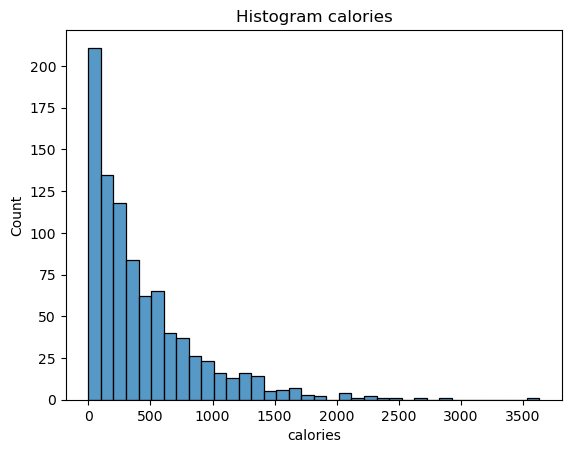

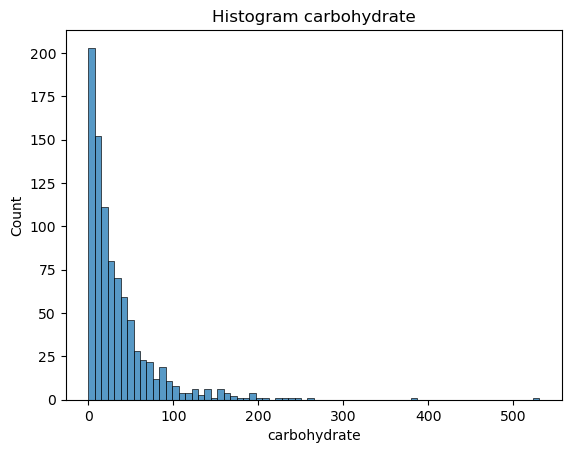

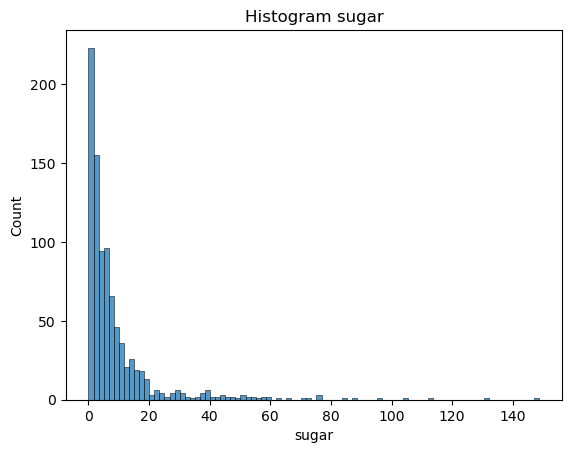

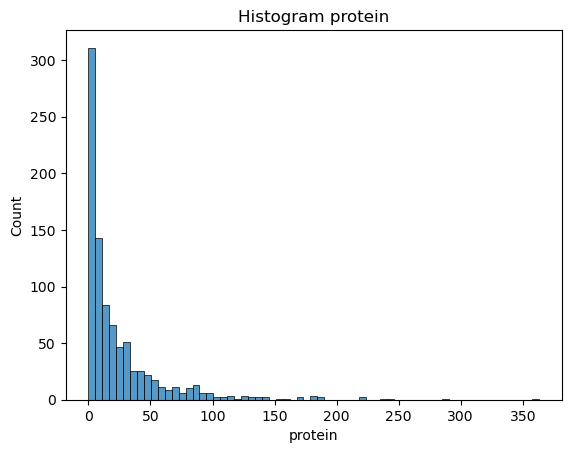

In [12]:
# build histplots for numeric variables
for i in numeric.columns:
    plt.title('Histogram %s'%i)
    plt.figsize=(15,15)
    sns.histplot(df[i])
    plt.show()

<AxesSubplot:title={'center':'Count plot (category)'}, xlabel='category', ylabel='count'>

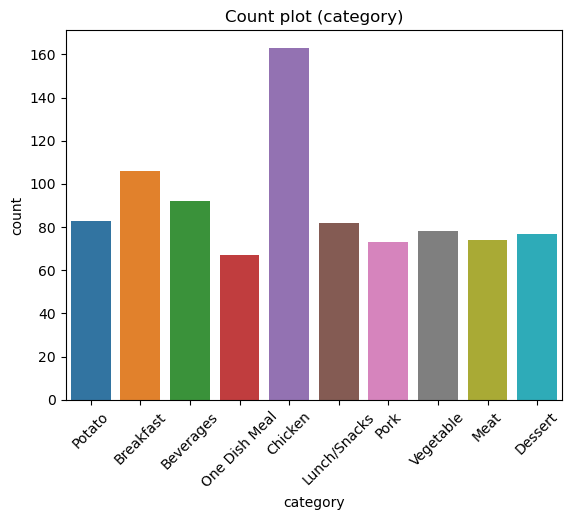

In [13]:
# check number of the categories
plt.title('Count plot (category)')
plt.figsize=(15,15)
plt.xticks(rotation=45)
sns.countplot(x=df['category'])

<AxesSubplot:title={'center':'Calories per category'}, xlabel='category', ylabel='calories'>

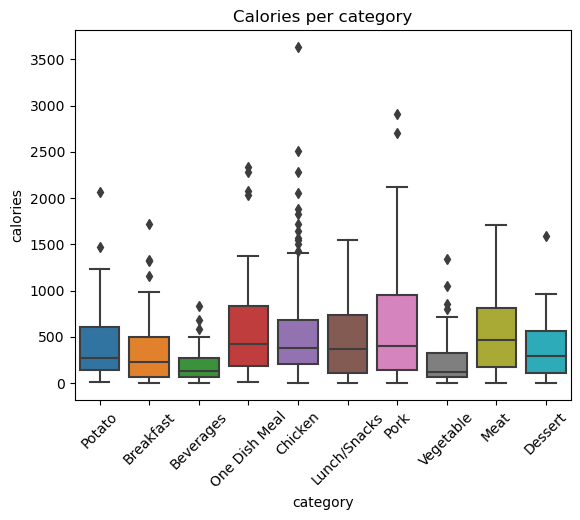

In [14]:
# check if categories and calories make sense
plt.title('Calories per category')
plt.figsize=(15,15)
plt.xticks(rotation=45)
sns.boxplot(x=df['category'], y=df['calories'])

<AxesSubplot:title={'center':'Servings per category'}, xlabel='category', ylabel='servings'>

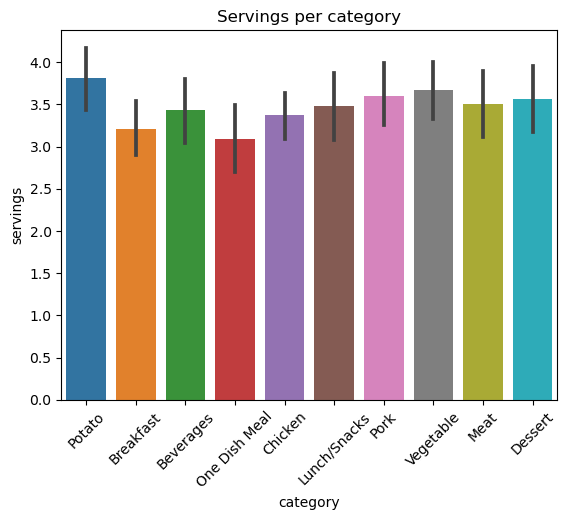

In [15]:
# check servings just for general view
plt.title('Servings per category')
plt.figsize=(15,15)
plt.xticks(rotation=45)
sns.barplot(x=df['category'], y=df['servings'])

<AxesSubplot:title={'center':'Count plot category by traffic'}, xlabel='category', ylabel='count'>

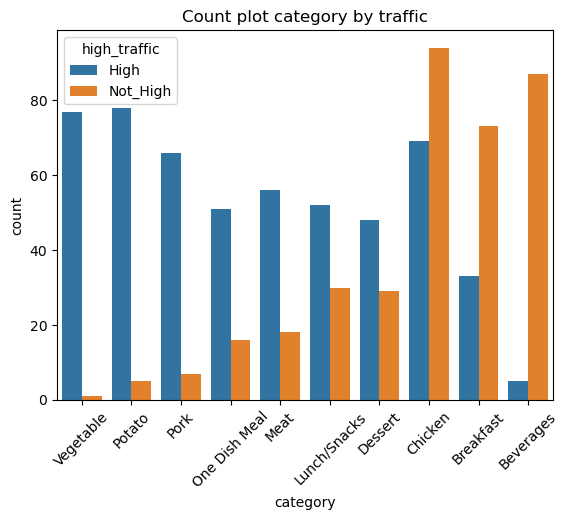

In [16]:
# get countplot to check relationship between high traffic and category
plt.title('Count plot category by traffic')
plt.figsize=(15,15)
plt.xticks(rotation=45)
sns.countplot(x=df['category'].sort_values(ascending=False), hue =df['high_traffic'])

<AxesSubplot:title={'center':'Check number of high vs not high traffic'}, xlabel='high_traffic', ylabel='count'>

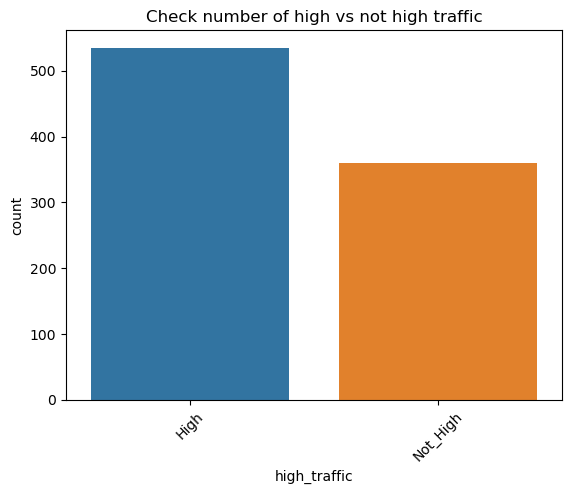

In [17]:
# check number of high traffic
plt.title('Check number of high vs not high traffic')
plt.figsize=(15,15)
plt.xticks(rotation=45)
sns.countplot(x=df['high_traffic'])

In [18]:
# in %
df['high_traffic'].value_counts(normalize=True)

High        0.597765
Not_High    0.402235
Name: high_traffic, dtype: float64

<AxesSubplot:title={'center':'Check number of high vs not high traffic by servings'}, xlabel='high_traffic', ylabel='count'>

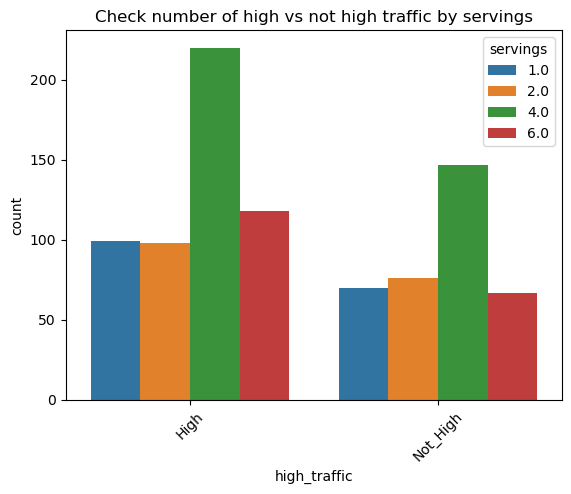

In [19]:
# check number of high vs not high traffic by servings
plt.title('Check number of high vs not high traffic by servings')
plt.figsize=(15,15)
plt.xticks(rotation=45)
sns.countplot(x=df['high_traffic'], hue = df['servings'] )

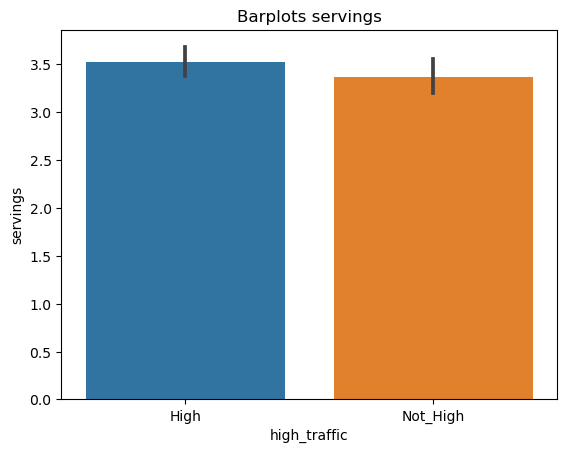

In [20]:
# check mean values igh vs not high traffic
plt.title('Barplots servings')
plt.figsize=(15,15)
sns.barplot(y=df['servings'], x=df['high_traffic'])
plt.show()

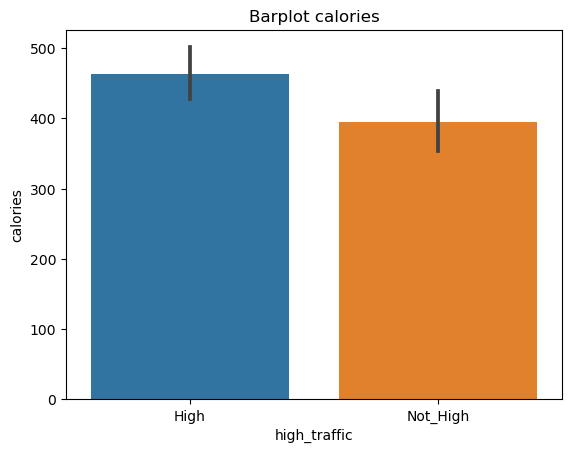

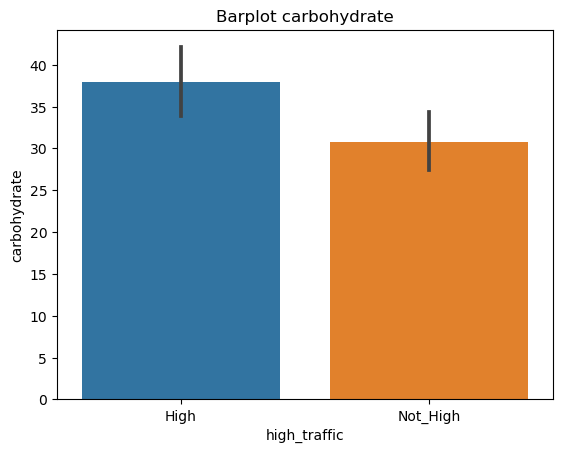

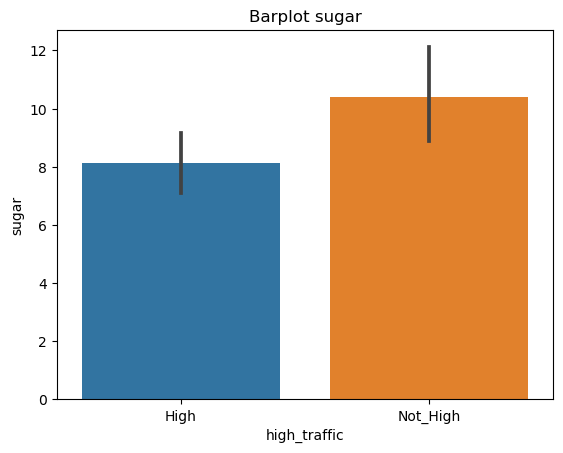

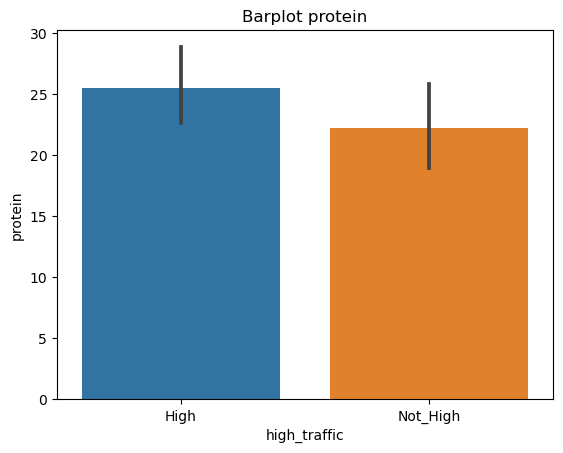

In [21]:
# plot high traffic against numeric variables
for i in numeric.columns:
    plt.title('Barplot %s'%i)
    plt.figsize=(15,15)
    sns.barplot(y=df[i], x=df['high_traffic'])
    plt.show()

In [22]:
# check df again
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 895 entries, 2 to 947
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   calories      895 non-null    float64
 1   carbohydrate  895 non-null    float64
 2   sugar         895 non-null    float64
 3   protein       895 non-null    float64
 4   category      895 non-null    object 
 5   servings      895 non-null    float64
 6   high_traffic  895 non-null    object 
dtypes: float64(5), object(2)
memory usage: 88.2+ KB


In [23]:
# check head again
df.head()

,calories,carbohydrate,sugar,protein,category,servings,high_traffic
recipe,,,,,,,
2,35.48,38.56,0.66,0.92,Potato,4.0,High
3,914.28,42.68,3.09,2.88,Breakfast,1.0,Not_High
4,97.03,30.56,38.63,0.02,Beverages,4.0,High
5,27.05,1.85,0.80,0.53,Beverages,4.0,Not_High
6,691.15,3.46,1.65,53.93,One Dish Meal,2.0,High


In [24]:
# run post processing
def post_processing(df):
#     le = LabelEncoder()
#     le.fit(df['category'])
#     print(le.classes_)
#     df['category'] = le.transform(df['category'])
    encoder = OneHotEncoder()
    encoder.fit(df[['category']])
    encoded_data = encoder.transform(df[['category']])
    encoded_df = pd.DataFrame(encoded_data.toarray(), columns=encoder.get_feature_names(['category']))
    df = pd.concat([df.reset_index(), encoded_df],axis=1)
    df = df.set_index('recipe').drop(['category'],axis=1)
    df['high_traffic'] = df['high_traffic'].replace({'High':1,'Not_High':0})
    return df

df = post_processing(df)
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 895 entries, 2 to 947
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   calories                895 non-null    float64
 1   carbohydrate            895 non-null    float64
 2   sugar                   895 non-null    float64
 3   protein                 895 non-null    float64
 4   servings                895 non-null    float64
 5   high_traffic            895 non-null    int64  
 6   category_Beverages      895 non-null    float64
 7   category_Breakfast      895 non-null    float64
 8   category_Chicken        895 non-null    float64
 9   category_Dessert        895 non-null    float64
 10  category_Lunch/Snacks   895 non-null    float64
 11  category_Meat           895 non-null    float64
 12  category_One Dish Meal  895 non-null    float64
 13  category_Pork           895 non-null    float64
 14  category_Potato         895 non-null    fl

,calories,carbohydrate,sugar,protein,servings,high_traffic,category_Beverages,category_Breakfast,category_Chicken,category_Dessert,category_Lunch/Snacks,category_Meat,category_One Dish Meal,category_Pork,category_Potato,category_Vegetable
recipe,,,,,,,,,,,,,,,,
2,35.48,38.56,0.66,0.92,4.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,914.28,42.68,3.09,2.88,1.0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,97.03,30.56,38.63,0.02,4.0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,27.05,1.85,0.80,0.53,4.0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,691.15,3.46,1.65,53.93,2.0,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


<Figure size 1500x1500 with 0 Axes>

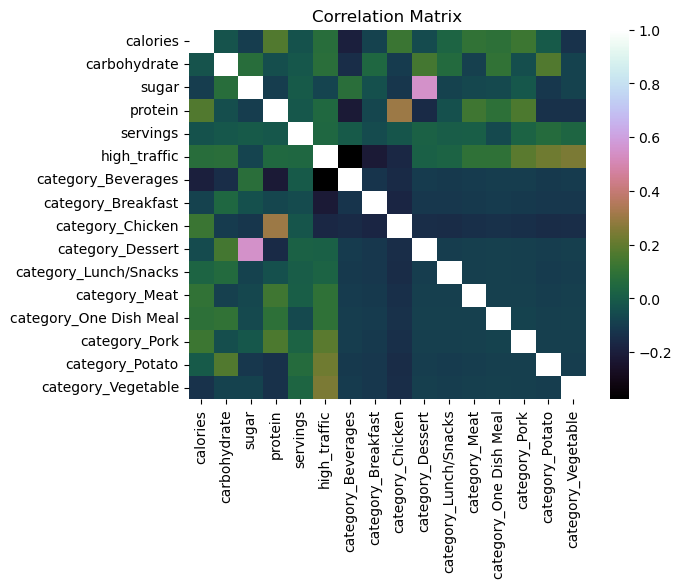

<Figure size 1500x1500 with 0 Axes>

In [25]:
# build correlation matrix
correlation = df.corr()
plt.title('Correlation Matrix')
sns.heatmap(correlation, vmax=1, annot = False, cmap='cubehelix')
plt.figure(figsize=(15, 15))

In [26]:
# look for high correlation
high_corr = pd.DataFrame(correlation['high_traffic'].loc[abs(correlation['high_traffic'])>0.001].sort_values()).drop('high_traffic')
high_corr_col = high_corr.index
high_corr.sort_values(by=['high_traffic'], key=lambda x: abs(x),ascending=False)

,high_traffic
category_Beverages,-0.375115
category_Vegetable,0.245382
category_Potato,0.222984
category_Breakfast,-0.214116
category_Pork,0.186179
category_Chicken,-0.167884
category_Meat,0.097345
category_One Dish Meal,0.094808
carbohydrate,0.080932
sugar,-0.075527


In [27]:
#find out most important features
X = df.drop('high_traffic',axis=1)
y = df['high_traffic']
bestfeatures = SelectKBest(k=5, score_func=f_classif)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']
main_feat = featureScores.nlargest(10,'Score').set_index('Specs')
main_feat

,Score
Specs,
category_Beverages,146.231789
category_Vegetable,57.214679
category_Potato,46.724939
category_Breakfast,42.907466
category_Pork,32.065094
category_Chicken,25.899331
category_Meat,8.543032
category_One Dish Meal,8.099599
carbohydrate,5.887661


In [28]:
# select only the most important features
X = df[main_feat.index]

In [29]:
# make categorical and numeric columns again
categorical_cols = [col for col in X.select_dtypes(include=['number']).columns 
                    if X[col].nunique() < 15]
numeric_cols = [col for col in X.select_dtypes(include=['number']).columns 
                    if X[col].nunique() > 15]

In [30]:
# deal with outliers
def box_outliers(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    Lower_fence = Q1 - (IQR * 3)
    Upper_fence = Q3 + (IQR * 3) 
    return Lower_fence, Upper_fence
Lower_fence, Upper_fence=box_outliers(X[numeric_cols])

def max_value(df, top):
    return np.where(df>top, top, df)
X[numeric_cols] = max_value(X[numeric_cols], Upper_fence)

In [31]:
# scale the data
scaler = MinMaxScaler()
X[numeric_cols] = scaler.fit_transform(X[numeric_cols])

In [32]:
# check df again
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 895 entries, 2 to 947
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   category_Beverages      895 non-null    float64
 1   category_Vegetable      895 non-null    float64
 2   category_Potato         895 non-null    float64
 3   category_Breakfast      895 non-null    float64
 4   category_Pork           895 non-null    float64
 5   category_Chicken        895 non-null    float64
 6   category_Meat           895 non-null    float64
 7   category_One Dish Meal  895 non-null    float64
 8   carbohydrate            895 non-null    float64
 9   sugar                   895 non-null    float64
dtypes: float64(10)
memory usage: 76.9 KB


In [33]:
# split train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=40)

In [34]:
# create predictions pipeline
def run_pred(X_train, y_train, ml_model,n):
    t0=time.time()
    model = ml_model
    model.fit(X_train, y_train)
    y_pred=model.predict(X_test)
    cv_f1 = cross_val_score(model,X_train, y_train, cv=n, scoring='f1')
    cv_f1_weighted = cross_val_score(model,X_train, y_train, cv=n, scoring='f1_weighted')
    cv_roc_auc=cross_val_score(model,X_train, y_train, cv=n, scoring='roc_auc')
    cv_log_loss=cross_val_score(model,X_train, y_train, cv=n, scoring='neg_log_loss')
    cv_accuracy=cross_val_score(model,X_train, y_train, cv=n, scoring='accuracy')
    cv_precison=cross_val_score(model,X_train, y_train, cv=n, scoring='precision')
    cv_recall=cross_val_score(model,X_train, y_train, cv=n, scoring='recall')
    time_taken = time.time()-t0
    print(f'Current baseline is {type(ml_model).__name__}')
    print(f'CV f1 score is {cv_f1.mean()}')
    print(f'CV f1 weighted score is {cv_f1_weighted.mean()}')
    print(f'CV area under the curve is {cv_roc_auc.mean()}')
    print(f'CV accuracy is {cv_accuracy.mean()}')
    print(f'CV precision is {cv_precison.mean()}')
    print(f'CV recall is {cv_recall.mean()}')
    print(f'\n')
    print("Time taken = {}".format(time_taken))
    print(f'\n')
    return y_pred

In [35]:
# run predictions
model_list=model_list=[LogisticRegression(), KNeighborsClassifier(),GaussianNB(),
                       DecisionTreeClassifier(),RandomForestClassifier()
                       ,LinearSVC(), Perceptron(), SGDClassifier()]
for i in model_list:
    y_pred = run_pred(X_train, y_train,i,10)

Current baseline is LogisticRegression
CV f1 score is 0.795545143684414
CV f1 weighted score is 0.7511882421214886
CV area under the curve is 0.8244423897581793
CV accuracy is 0.7524065540194572
CV precision is 0.7927151983747571
CV recall is 0.8012091038406828


Time taken = 0.5803306102752686


Current baseline is KNeighborsClassifier
CV f1 score is 0.7540301419338858
CV f1 weighted score is 0.7013916495487049
CV area under the curve is 0.7770072901849218
CV accuracy is 0.7028161802355352
CV precision is 0.7478357808677599
CV recall is 0.7642247510668564


Time taken = 0.4792184829711914


Current baseline is GaussianNB
CV f1 score is 0.7107994205780422
CV f1 weighted score is 0.7087769781236013
CV area under the curve is 0.8281909080132765
CV accuracy is 0.7092165898617512
CV precision is 0.8767930817669928
CV recall is 0.6024182076813657


Time taken = 0.3258788585662842


Current baseline is DecisionTreeClassifier
CV f1 score is 0.6923660502607871
CV f1 weighted score is 0.6501046

In [36]:
# leave only best models
model_list=model_list=[LogisticRegression(),LinearSVC(), SGDClassifier()]

for i in model_list:
   run_pred(X_train, y_train,i,10)

Current baseline is LogisticRegression
CV f1 score is 0.795545143684414
CV f1 weighted score is 0.7511882421214886
CV area under the curve is 0.8244423897581793
CV accuracy is 0.7524065540194572
CV precision is 0.7927151983747571
CV recall is 0.8012091038406828


Time taken = 0.6158843040466309


Current baseline is LinearSVC
CV f1 score is 0.7965945264004632
CV f1 weighted score is 0.7529330810482923
CV area under the curve is 0.8264592223802751
CV accuracy is 0.7539938556067589
CV precision is 0.7945978118852774
CV recall is 0.8012091038406828


Time taken = 0.4072737693786621


Current baseline is SGDClassifier
CV f1 score is 0.8005771673350083
CV f1 weighted score is 0.7037136540800635
CV area under the curve is 0.808524893314367
CV accuracy is 0.730005120327701
CV precision is 0.7588994693710573
CV recall is 0.7241109530583214


Time taken = 0.391726016998291




In [37]:
model = SGDClassifier()
param_grid = {'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10],
              'penalty': ['l1', 'l2', 'elasticnet'],
              'l1_ratio': [0, 0.15, 0.5, 0.85, 1],
              'max_iter': [1000, 5000, 10000],
              'loss': ['hinge', 'log', 'modified_huber', 'squared_hinge']}
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=7)
grid_search = GridSearchCV(model, param_grid, scoring='accuracy', n_jobs=-1, cv=kfold, verbose=1)
grid_result = grid_search.fit(X_train, y_train)
best_model_sgd = grid_search.best_estimator_
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Fitting 5 folds for each of 1080 candidates, totalling 5400 fits


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/linear_mo

Best: 0.755568 using {'alpha': 0.001, 'l1_ratio': 0.15, 'loss': 'log', 'max_iter': 1000, 'penalty': 'elasticnet'}


In [38]:
# run grid search to improve results
model = LogisticRegression()
param_grid = {'C': [0.01, 0.1, 1, 10, 100],
              'penalty': ['l1', 'l2'],
              'solver': ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga'],
              'fit_intercept': [True, False],
              'class_weight': [None, 'balanced']}
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
grid_search = GridSearchCV(model, param_grid, scoring='accuracy', n_jobs=-1, cv=kfold, verbose=1)
grid_result = grid_search.fit(X_train, y_train)
best_model_logreg = grid_search.best_estimator_
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Fitting 10 folds for each of 200 candidates, totalling 2000 fits
Best: 0.753917 using {'C': 0.1, 'class_weight': 'balanced', 'fit_intercept': True, 'penalty': 'l1', 'solver': 'saga'}


In [39]:
# get predictions
y_pred_logreg = run_pred(X_train, y_train,best_model_logreg,10)

Current baseline is LogisticRegression
CV f1 score is 0.7965945264004632
CV f1 weighted score is 0.7529330810482923
CV area under the curve is 0.8266826102418208
CV accuracy is 0.7539938556067589
CV precision is 0.7945978118852774
CV recall is 0.8012091038406828


Time taken = 0.5133662223815918




In [40]:
y_pred_sgd = run_pred(X_train, y_train,best_model_sgd,10)

Current baseline is SGDClassifier
CV f1 score is 0.7888374879670655
CV f1 weighted score is 0.730701885030953
CV area under the curve is 0.826557728781413
CV accuracy is 0.7507168458781363
CV precision is 0.7857086952630189
CV recall is 0.8172119487908962


Time taken = 0.41050219535827637




In [41]:
# asses prediction results
def run_pred_test(y_test, y_pred):    
    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred) 
    print("Y_test Accuracy = {}".format(accuracy))
    print("Y_test ROC Area under Curve = {}".format(roc_auc))
    print('Confusion matrix:')
    print(confusion_matrix(y_test, y_pred))
    print('\nClassification report:')
    print(classification_report(y_test, y_pred))

In [42]:
#asses the results logreg
run_pred_test(y_test,y_pred_logreg)

Y_test Accuracy = 0.7806691449814126
Y_test ROC Area under Curve = 0.7771125555935683
Confusion matrix:
[[ 84  27]
 [ 32 126]]

Classification report:
              precision    recall  f1-score   support

           0       0.72      0.76      0.74       111
           1       0.82      0.80      0.81       158

    accuracy                           0.78       269
   macro avg       0.77      0.78      0.78       269
weighted avg       0.78      0.78      0.78       269



In [43]:
#asses the results sgd
run_pred_test(y_test,y_pred_sgd)

Y_test Accuracy = 0.7286245353159851
Y_test ROC Area under Curve = 0.6885904892234006
Confusion matrix:
[[ 51  60]
 [ 13 145]]

Classification report:
              precision    recall  f1-score   support

           0       0.80      0.46      0.58       111
           1       0.71      0.92      0.80       158

    accuracy                           0.73       269
   macro avg       0.75      0.69      0.69       269
weighted avg       0.74      0.73      0.71       269



In [44]:
# create metric
high_prob = best_model_logreg.predict_proba(X)[:, 1].mean()
high_prob

0.5156842761786127